# Plot to verify agreement between best model and $\zeta$ Ophiuchi observable
author: [Mathieu Renzo](mailto:mrenzo@flatironinstitute.org)

In [1]:
import sys
# the line below import stuff from git@github.com:mathren90/plotFunc.git
sys.path.append('/mnt/home/mrenzo/codes/python_stuff/plotFunc/')
from MESAreader import *
import matplotlib.pyplot as plt
%matplotlib inline
from plotDefaults import * 
# plot_aux defines many auxiliary functions to make plots
from plot_aux import *

In [2]:
set_plotDefaults()

done in plotDefaults.py


In [14]:
# root folder for best model
# folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_Z0.0124/"
folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/experiments/Z0.01_50days"
binary_exp_ov = folder+"/binary_to_donor_Hedepl/"
accretor_exp_ov = folder+"/accretor_to_TAMS/"
hfile1 = binary_exp_ov+'/LOGS2/history.data'
hfile2 = accretor_exp_ov+'/LOGS/history.data'
model_name = folder.split('/')[-2].replace('_','\_')
print(model_name)

experiments


(4.6, 4.5)

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


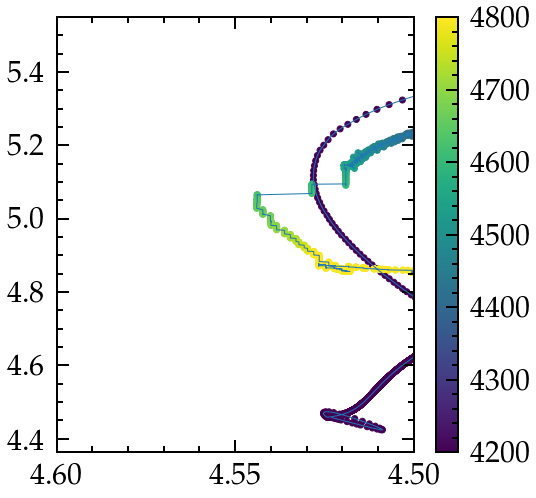

In [11]:
# analize MT
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

logL, logTeff = getlogLlogTeff(hfile1)
src, col = getSrcCol(hfile1)
modnum = src[:, col.index("model_number")]

p = ax.scatter(logTeff, logL, c=modnum, vmin=4200,vmax=4800)
fig.colorbar(p)
ax.plot(logTeff, logL, lw=1)
ax.invert_xaxis()
ax.set_xlim(4.6, 4.5)


0.68767 0.30233 0.00205 0.00074 0.00415


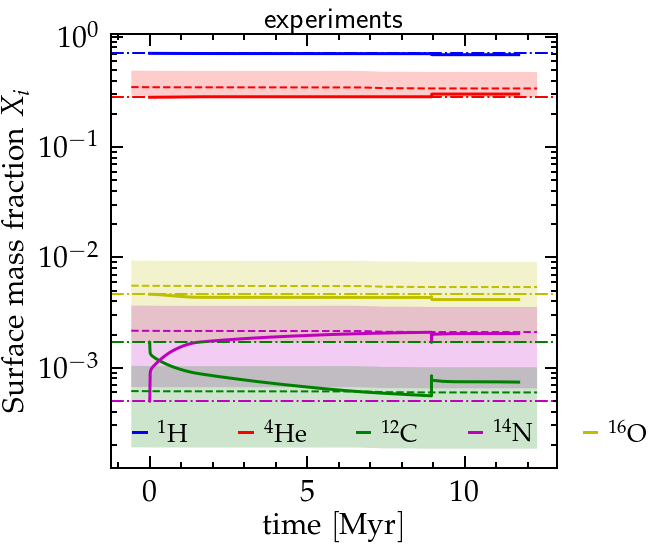

In [18]:
# chemical composition
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

final_h1, final_he4, final_n14, final_c12, final_o16 = plot_surface_abundances(hfile1, hfile2=hfile2, ax=ax, label=model_name)
ax.legend(handlelength=0.5, handletextpad=0.5, ncol=5, loc="best", fontsize=25)
ax.set_yscale('log')
print(f"{final_h1:0.5f}", f"{final_he4:0.5f}", f"{final_n14:0.5f}", f"{final_c12:0.5f}", f"{final_o16:0.5f}")

Text(0, 0.5, '$v_\\mathrm{rot} \\ \\mathrm{[km\\ s^{-1}]}$')

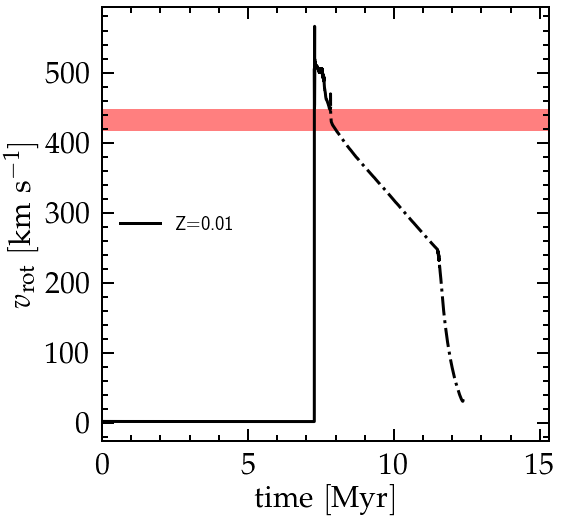

In [25]:
# surface rotation rate
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

plot_surface_rotation_time(ax, hfile1, c='k', hfile2=hfile2, label="Z=0.01")

# overplot observational range
vsini, err_vsini = get_zeta_oph_vsini()
ax.set_xlim(0, 15.3)
xmin, xmax = ax.get_xlim()
ax.fill_between(np.linspace(xmin, xmax,2), [vsini-err_vsini], [vsini+err_vsini], facecolor='r', alpha=0.5, zorder=1)
ax.legend(loc="center left", fontsize=20)
ax.set_xlabel(r"$\mathrm{time \ [Myr]}$")
# ax.set_xlim(xmin=8)
# ax.set_ylim(ymin=200)
ax.set_ylabel(r"$v_\mathrm{rot} \ \mathrm{[km\ s^{-1}]}$")

Text(0, 0.5, '$\\log_{10}(g/\\mathrm{cm\\ s^{-2}})$')

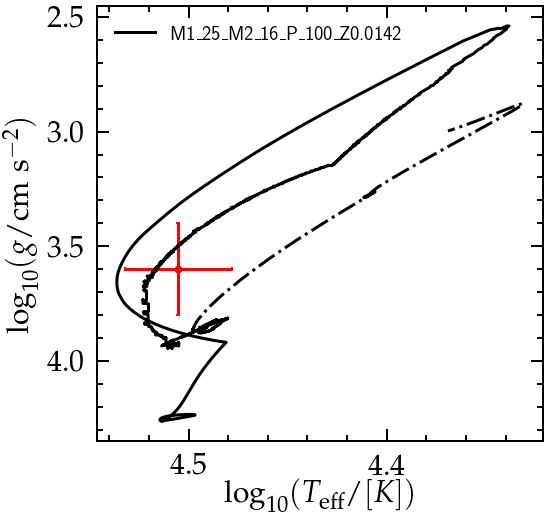

In [27]:
# spectroscopic HRD
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])
plot_spectroscopic_HRD(ax, hfile1, c='k', hfile2=hfile2, label=model_name)
zeta_oph_spectroscopicHRD(ax)
ax.legend(fontsize=20)    
ax.invert_xaxis()
ax.invert_yaxis()    
ax.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/ [K])$")
ax.set_ylabel(r"$\log_{10}(g/\mathrm{cm\ s^{-2}})$")


/mnt/home/mrenzo/RUNS/zeta_ophiuchi/experiments/Z0.01_50days/binary_to_donor_Hedepl/


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


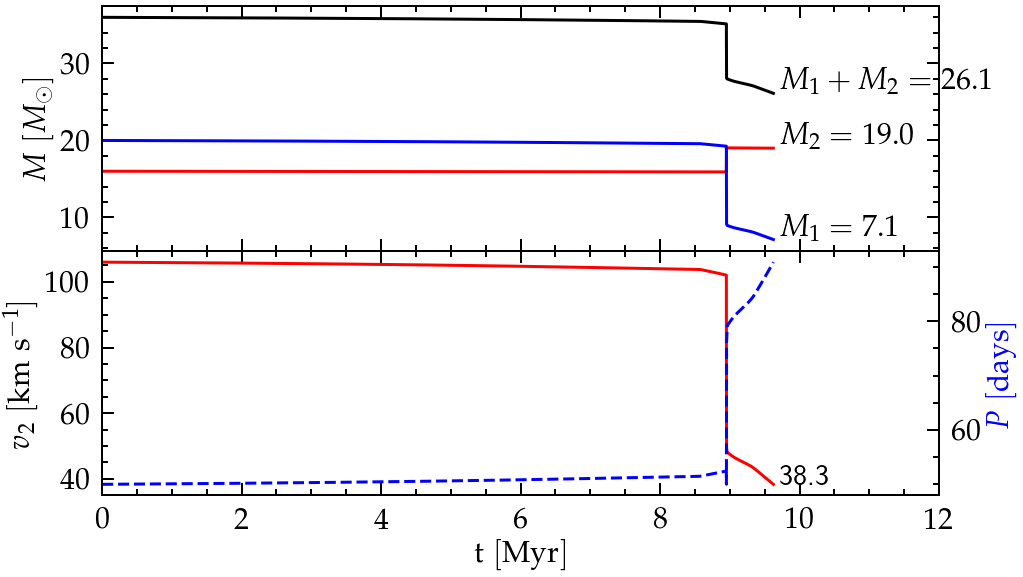

In [19]:
# orbital evolution
MassVelocityEvolution(binary_exp_ov, figName="")